# SVM
- 선형이나 비선형의 데이터들을 분류하는데 가장 일반적으로 많이 사용하는 머신러닝 방법
- 회귀나 이상치 탐색에도 사용 가능

# 5.1 선형 SVM 분류

### 라지 마진 분류(=large margin classification)
- SVM 선형 분류기의 결정 경계는 두 개의 클래스를 나누면서 제일 가까운 훈련 샘플로부터 가능한 한 멀리 떨어져 있으려고 함
- 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않음
- **서포트 벡터**: 결정 경계와 가장 가깝게 위치한 샘플

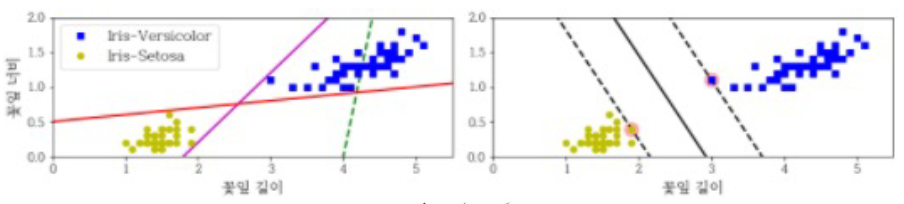

### 특성 스케일에 따른 민감성
- (왼쪽)수직축의 스케일이 수평축의 스케일보다 훨씬 커서 가장 넓은 도로가 거의 수평에 가깝게 됨
- (오른쪽)특성의 스케일을 조정하면 결정 경계가 훨씬 좋아짐
- 사이킷런의 StandardScaler 사용

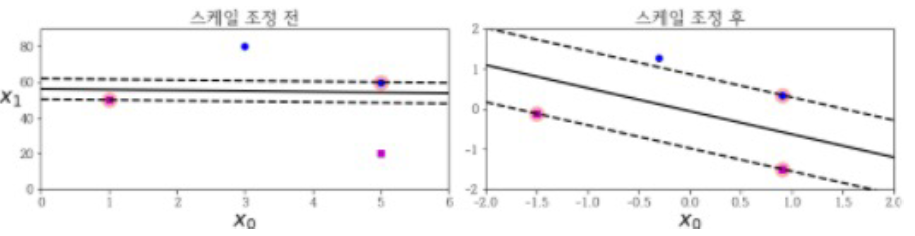

### 하드 마진 분류(Hard margin classification)
- 모든 샘플이 결정 경계 범위의 바깥쪽에 올바르게 분류된 경우
- 데이터가 선형적으로 구분될 수 있어야 제대로 작동
- 이상치에 민감
- 결정 경계 찾는 것이 불가능하거나 훈련 데이터셋에 과대적합되어 일반화가 잘 안됨.

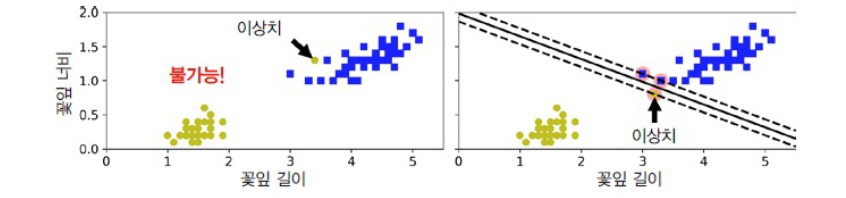

### 소프트 마진 분류(Soft margin classification)
- 도로의 폭을 가능한 넓게 유지하는 것과 마진 오류 사이에 적절한 균형을 잡는 유연한 모델
- C 하이퍼파라미터를 사용해 균형 조절 가능
 - C 값을 줄일 경우: 도로의 폭이 넓어지지만 마진 오류도 커짐
 - C 값을 늘릴 경우: 도로의 폭이 좁아지면서 마진 오류도 적어짐

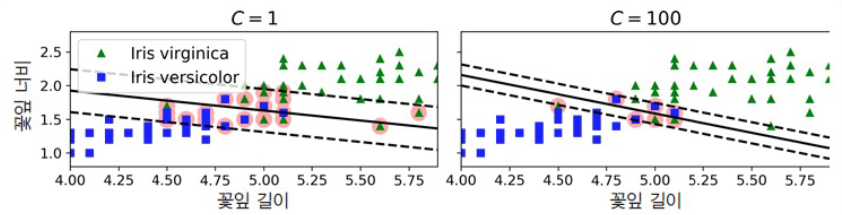

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]                      #꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)    #Iris-Virginica면 1, 아니면 0
                                                #0: setosa / 1:virsicolor / 2:virginica

Text(0.5, 1.0, 'feature scatter')

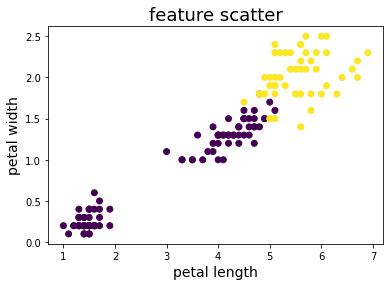

In [11]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)     #scatter(x,y,s=마커 크기 값(또는 배열),c=마커 색 값(또는 배열))
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("feature scatter", fontsize=18)
#노랑:iris-virginica/  보라:non virginica

In [12]:
#PipeLine생성
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [13]:
#model fitting
svm_clf.fit(X,y)
print(svm_clf.named_steps["linear_svc"].coef_)        #weight벡터
print(svm_clf.named_steps["linear_svc"].intercept_)   #bias

[[1.63328659 2.38787096]]
[-2.50521243]


In [6]:
svm_clf.predict([[3.8, 1.7]])

array([0.])

$ x_2 =  {w_1 \over w_2}x_1 + {1 \over w_2}b $ 

-----
SVM 결정 직선
- w: 결정 직선의 기울기
- b: 결정 직전의 절편
- line: 결정 직선을 지나는 두 점

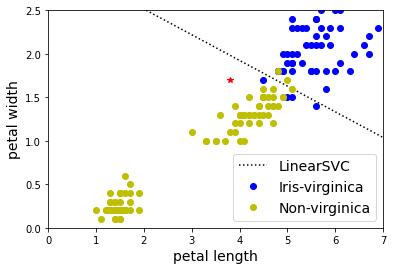

In [15]:
w = -svm_clf.named_steps["linear_svc"].coef_[0,0]/svm_clf.named_steps["linear_svc"].coef_[0,1]
b = -svm_clf.named_steps["linear_svc"].intercept_[0]/svm_clf.named_steps["linear_svc"].coef_[0,1]
line = svm_clf.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b],[5, 5*w+b]])


plt.figure()
plt.plot(line[:,0], line[:,1], "k:", label="LinearSVC")
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo', label='Iris-virginica')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Non-virginica')
plt.plot(3.8,1.7,'r*')

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis([0, 7, 0, 2.5])
plt.show()

# 5.2 비선형 svm 분류

### 비선형 SVM 분류
- **(1) 다항식 특성을 추가하여 분류**
- 사이킷런: PolynomialFeatures, StandardScalar, LinearSVC

In [16]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [17]:
#X, y=make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=50000))  #c값 조절(1,100)
])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=50000))])

- 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만듦

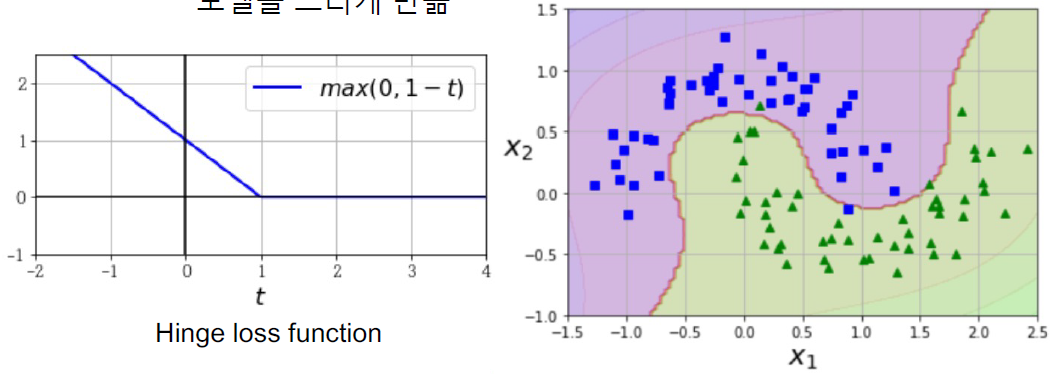

### 커널 트릭(kernel trick)

- 어떠한 특성도 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있음
-----
- 3차 다항식 커널을 사용해 SVM 분류기를 훈련
- 모델이 과대적합이라면 다항식의 차수를 줄여야 함. (모델이 과소적합이라면 차수를 늘려야 함)
- 매개변수 coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절

In [22]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### 유사도 특성
- (2) 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 **유사도 함수(similarity function)로 계산한 특성 추가**

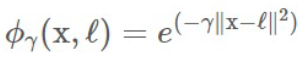

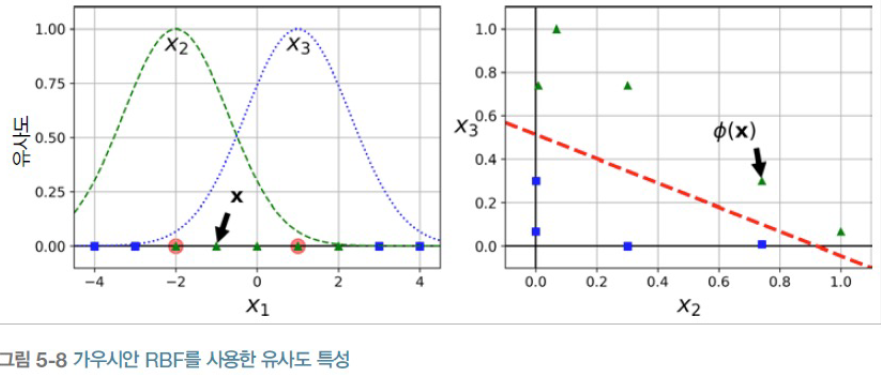

### 가우시안 RBF 커널

**gamma:규제의 역할**
- gamma를 증가
 - 종 모양 그래프가 좁아져서 각 샘플의 영향 경계가 작아짐
 - 결정 경계가 좀 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어짐
- gamma값 감소
 - 넓은 종 모양 그래프를 만듦
 - 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워짐

- 모델이 과대적합일때는 감소시켜야 하고, 과소적합일때는 증가시켜야 함(하이퍼파라미터 C와 비슷)


In [23]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])